# Задача 5. Обучение без учителя

* **Дедлайн**: 26.04.2024, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [x] Найти данные с количеством признаков хотя бы 50, на которых можно решить задачу кластеризации.
- [x] Выполнить разведочный анализ (**EDA**). При необходимости выполнить полезные преобразования данных.
- [x] Самостоятельно реализуйте один из алгоритмов кластеризации, например **K-means**.
- [x] Обучите модели кластеризации, используя свою реализацию, а также хотя бы две реализации из **sklearn** (**KMeans**, **Affinity Propogation**, **DBSCAN** и тд).
- [x] При обучении использовать **подбор гиперпараметров**.
- [x] Сравнить качество моделей: замерить скорость обучения, вычислить различные метрики качества.
- [x] * (**+3 балла**) Также снизить размерность данных с помощью метода главных компонент **PCA** и и понять качество дальнейшей кластеризации всеми использованными реализациями при различном количестве главных компонент.
- [x] * (**+2 балла**) Визуализировать данные снижением размерности до 2 или 3 с помощью **PCA** и **t-SNE**. В случае проблем с производительностью **t-SNE**, можно сначала до какой то степени снизить размерность с помощью **PCA**, а затем запустить **t-SNE**.


Есть 4 группы людей и 217 вопросов об их интересах (например, "нравится ли Вам играть в шахматы?", "нравится ли Вам плавать?"). Требуется кластеризовать людей по их интересам. 

# Разведочный анализ (EDA)

## Описание датасета

В качестве данных был взят датасет [interests_groups.csv](https://www.kaggle.com/datasets/rainbowgirl/clustering-categorical-peoples-interests/data).

Описание датасета: <br>

* Группы - 4 группы людей, каждая из которых имеет свои уникальные характеристики и интересы <br>
* Вопросы о хобби и интересах - 217 вопросов, на которые участники отвечают "Да" или "Нет", например: "Вам нравится играть в шахматы?" <br>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_palette("Set2")

In [38]:
df = pd.read_csv("data/interests_group.csv")

In [39]:
df.isnull().sum()

group                     0
grand_tot_interests       0
1                      5347
2                      6339
3                      6305
                       ... 
213                    6338
214                    6268
215                    1397
216                    2282
217                    6193
Length: 219, dtype: int64

In [40]:
df.head()

,group,grand_tot_interests,1,2,3,4,5,6,7,8,...,208,209,210,211,212,213,214,215,216,217
0,C,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,43,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,C,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,C,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,C,36,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN


In [41]:
interest_columns = list(df.columns)[2:]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6340 entries, 0 to 6339
Columns: 219 entries, group to 217
dtypes: float64(217), int64(1), object(1)
memory usage: 10.6+ MB


In [43]:
df.describe()

,grand_tot_interests,1,2,3,4,5,6,7,8,9,...,208,209,210,211,212,213,214,215,216,217
count,6340.000000,993.0,1.0,35.0,25.0,798.000000,3394.000000,1.0,93.0,333.000000,...,118.000000,110.0,5037.000000,2474.000000,877.000000,2.0,72.0,4943.000000,4058.000000,147.0
mean,37.312303,1.0,1.0,1.0,1.0,1.001253,1.000589,1.0,1.0,1.003003,...,1.008475,1.0,1.000596,1.000808,1.002281,1.0,1.0,1.000202,1.000246,1.0
std,15.729872,0.0,NaN,0.0,0.0,0.035400,0.024271,NaN,0.0,0.054800,...,0.092057,0.0,0.024400,0.028427,0.047727,0.0,0.0,0.014223,0.015698,0.0
min,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
25%,28.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
50%,39.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
75%,48.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
max,104.000000,1.0,1.0,1.0,1.0,2.000000,2.000000,1.0,1.0,2.000000,...,2.000000,1.0,2.000000,2.000000,2.000000,1.0,1.0,2.000000,2.000000,1.0


In [44]:
df['group'].value_counts()

group
I    1809
P    1731
C    1725
R    1075
Name: count, dtype: int64

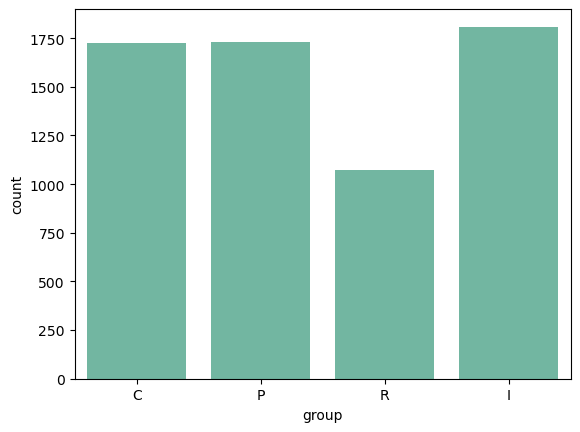

In [45]:
sns.countplot(data=df, x='group');

In [46]:
df[interest_columns].sum().reset_index(name='cnt')

,index,cnt
0,1,993.0
1,2,1.0
2,3,35.0
3,4,25.0
4,5,799.0
...,...,...
212,213,2.0
213,214,72.0
214,215,4944.0
215,216,4059.0


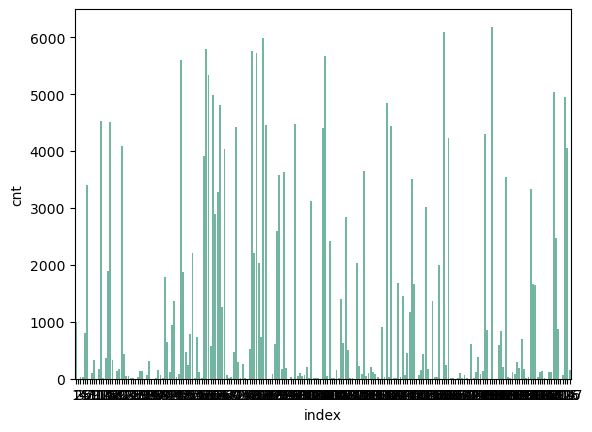

In [47]:
sns.barplot(data=df[interest_columns].sum().reset_index(name='cnt'), x='index', y='cnt');

In [48]:
df[interest_columns].sum().max()

6185.0

In [49]:
df[interest_columns].sum().idxmax()

'183'

In [50]:
df[interest_columns].sum().min()

1.0

In [51]:
df[interest_columns].sum().idxmin()

'2'

# Preprocessing

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
df.fillna(0, inplace=True)

In [54]:
le = LabelEncoder()
df['group'] = le.fit_transform(df['group'])

In [55]:
ground_truth_labels = df['group']
df.drop(columns='group', inplace=True)

In [56]:
df.columns = df.columns.astype(str)

In [57]:
df.isna().sum()

grand_tot_interests    0
1                      0
2                      0
3                      0
4                      0
                      ..
213                    0
214                    0
215                    0
216                    0
217                    0
Length: 218, dtype: int64

In [58]:
RANDOM_STATE = 42

# PCA

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

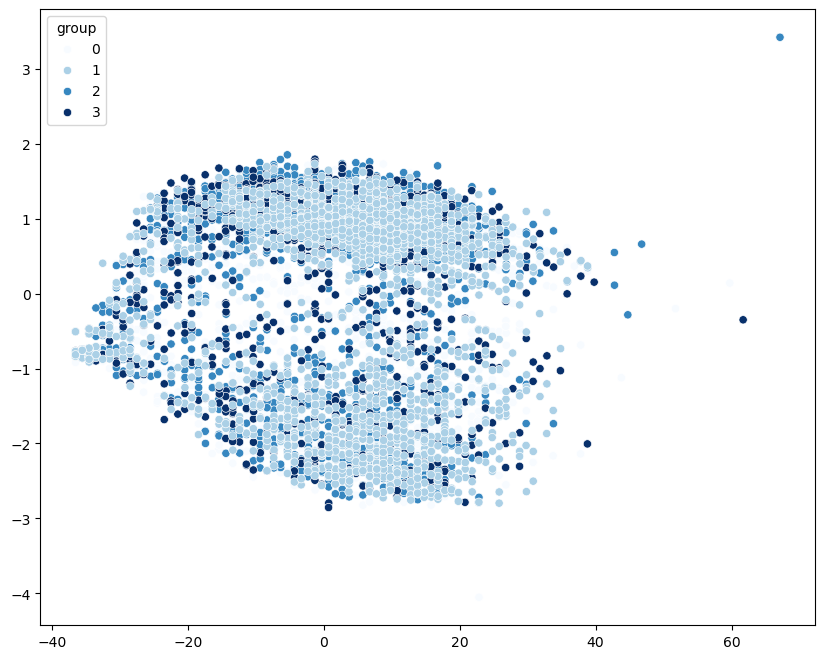

In [61]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=ground_truth_labels, palette=plt.colormaps['Blues']);

# t-SNE

In [62]:
from sklearn.manifold import TSNE

In [63]:
tsne = TSNE(random_state=RANDOM_STATE)
df_tsne = tsne.fit_transform(df)

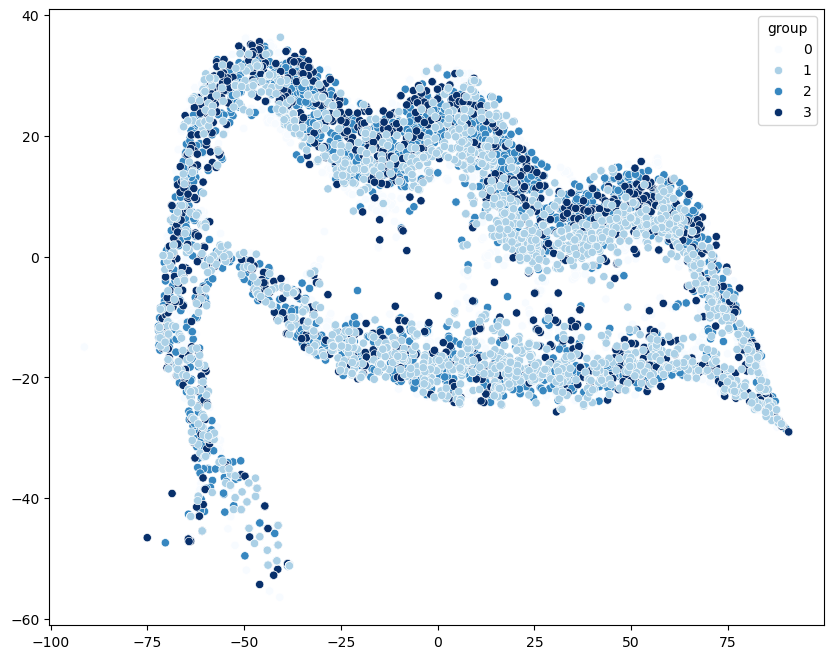

In [64]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1], hue=ground_truth_labels, palette=plt.colormaps['Blues']);

# CustomKMeans

In [65]:
from sklearn.base import BaseEstimator
from sklearn.utils.validation import check_array

class CustomKMeans(BaseEstimator):
    def __init__(self, n_clusters=5, max_iter=200, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state

    def predict(self, X):
        return self._get_labels(X)

    def fit(self, X):
        X = check_array(X)
        rs = np.random.RandomState(self.random_state)
        self.cluster_centers_ = X[rs.choice(len(X), size=self.n_clusters, replace=False), :]
        n_features = X.shape[1]
        max_dist = np.inf
        iters = 0

        while max_dist > self.tol and iters <= self.max_iter:
            labels = self._get_labels(X)

            next_means = np.empty((self.n_clusters, n_features))
            for l in np.unique(labels):
                next_means[l] = X[labels == l].mean(axis=0)

            max_dist = np.max(np.linalg.norm(self.cluster_centers_ - next_means, axis=1))

            self.cluster_centers_ = next_means

        return self

    def fit_predict(self, X):
        X = check_array(X)
        fitted = self.fit(X)
        return fitted.predict(X)

    def _get_labels(self, X):
        X = check_array(X)
        return np.argmin(
            np.linalg.norm(X[..., np.newaxis] - self.cluster_centers_.T, axis=1),
            axis=1
        )


# Обучение

In [66]:
from time import time
from sklearn.metrics import adjusted_rand_score, silhouette_score, homogeneity_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans, SpectralClustering
from sklearn.base import clone
from itertools import product

In [67]:
def fit(estimator, params, X, labels):
    model = clone(estimator).set_params(**params)

    fit_start_time = time()
    pred = model.fit_predict(X)
    fit_time = time() - fit_start_time

    return {
        "fit_time": fit_time,
        "ari": adjusted_rand_score(labels, pred),
        "silhouette": silhouette_score(X, pred) if len(pred) > 1 else np.nan,
        "homogeneity": homogeneity_score(labels, pred)
    }

In [68]:
from datetime import datetime

def tune(id, estimator, possible_params, X, labels):
    param_names = list(possible_params.keys())
    possible_param_values = list(possible_params.values())
    results = {
        'id': id,
        'name': estimator.__class__.__name__,
        'ari': {},
        'silhouette': {},
        'homogeneity': {}
    }

    for param_values in product(*possible_param_values):
        params = dict(zip(param_names, param_values))
        fit_results = fit(estimator, params, X, labels)

        current_time = datetime.now().strftime("%H:%M:%S")
        print(f"{current_time} | name: {estimator.__class__.__name__}, params: {params}, fit_results: {fit_results}")

        for metric in ['ari', 'silhouette', 'homogeneity']:
            cur = results[metric]
            new_score = fit_results[metric]

            if 'best_score' not in cur or new_score > cur['best_score']:
                results[metric] = {
                    'fit_time': fit_results['fit_time'],
                    'best_score': new_score,
                    'best_params': params
                }

    current_time = datetime.now().strftime("%H:%M:%S")
    print(f"{current_time} | -> {results}")

    return results

In [69]:
def run_tune(estimator_list, X, labels):
    return [tune(i, est['estimator'], est['possible_params'], X, labels) for i, est in enumerate(estimator_list)]

def run(estimator_list, df_list, labels):
    result_df_list = []
    for df in df_list:
        best_results = pd.DataFrame(run_tune(estimator_list, df, labels))
        best_results['dim'] = df.shape[1]
        result_df_list.append(best_results)

    return pd.concat(result_df_list)


In [70]:
ESTIMATORS = [
    {
        'estimator': AgglomerativeClustering(),
        'possible_params': {
            'n_clusters': [2, 4, 7, 10],
            'compute_full_tree': [True, False],
            'linkage': ['ward', 'average',]
        }
    },
    {
        'estimator': AgglomerativeClustering(),
        'possible_params': {
            'n_clusters': [2, 4, 7, 10],
            'compute_full_tree': [True, False],
            'linkage': ['ward', 'average']
        }
    },
    {
        'estimator': DBSCAN(),
        'possible_params': {
            'eps': [0.5, 10],
            'min_samples': [5, 10, 15],
            'algorithm': ['ball_tree', 'kd_tree']
        }
    },
    {
        'estimator': KMeans(random_state=RANDOM_STATE),
        'possible_params': {
            'n_clusters': [2, 4, 7, 10],
            'max_iter': [100, 250, 500],
            'tol': [1e-4, 1e-6]
        }
    },
    {
        'estimator': SpectralClustering(random_state=RANDOM_STATE),
        'possible_params': {
            'n_clusters': [2, 4, 7, 10],
            'eigen_solver': ['arpack', 'amg'],
        }
    },
    {
        'estimator': CustomKMeans(random_state=RANDOM_STATE),
        'possible_params': {
            'n_clusters': [2, 4, 7, 10],
            'max_iter': [100, 250, 500],
            'tol': [1e-4, 1e-5]
        }
    }
]

In [71]:
n_components_list = [20, 40, 50, 100]
df_list = [df, *(PCA(n_components=i).fit_transform(df) for i in n_components_list)]

In [72]:
res_df = run(ESTIMATORS, df_list, ground_truth_labels)

21:51:41 | name: AgglomerativeClustering, params: {'n_clusters': 2, 'compute_full_tree': True, 'linkage': 'ward'}, fit_results: {'fit_time': 3.822585344314575, 'ari': 0.00846945830561558, 'silhouette': 0.5369885622740721, 'homogeneity': 0.005744008825735619}
21:51:46 | name: AgglomerativeClustering, params: {'n_clusters': 2, 'compute_full_tree': True, 'linkage': 'average'}, fit_results: {'fit_time': 3.982001781463623, 'ari': 0.00011075656786680713, 'silhouette': 0.4735214276302589, 'homogeneity': 8.537811012037419e-05}
21:51:50 | name: AgglomerativeClustering, params: {'n_clusters': 2, 'compute_full_tree': False, 'linkage': 'ward'}, fit_results: {'fit_time': 3.8020308017730713, 'ari': 0.00846945830561558, 'silhouette': 0.5369885622740721, 'homogeneity': 0.005744008825735619}
21:51:55 | name: AgglomerativeClustering, params: {'n_clusters': 2, 'compute_full_tree': False, 'linkage': 'average'}, fit_results: {'fit_time': 3.9970219135284424, 'ari': 0.00011075656786680713, 'silhouette': 0.47

/home/vs9lh/.local/lib/python3.12/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


23:24:18 | name: SpectralClustering, params: {'n_clusters': 10, 'eigen_solver': 'arpack'}, fit_results: {'fit_time': 66.45693588256836, 'ari': 0.00017199683489468702, 'silhouette': 0.40108573070102305, 'homogeneity': 0.001937383620004671}


/home/vs9lh/.local/lib/python3.12/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


23:25:28 | name: SpectralClustering, params: {'n_clusters': 10, 'eigen_solver': 'amg'}, fit_results: {'fit_time': 67.85269403457642, 'ari': 0.00017199683489468702, 'silhouette': 0.40108573070102305, 'homogeneity': 0.001937383620004671}
23:25:28 | -> {'id': 4, 'name': 'SpectralClustering', 'ari': {'fit_time': 61.52146506309509, 'best_score': 0.0002558747732374682, 'best_params': {'n_clusters': 7, 'eigen_solver': 'amg'}}, 'silhouette': {'fit_time': 728.757509469986, 'best_score': 0.7065411177879035, 'best_params': {'n_clusters': 2, 'eigen_solver': 'arpack'}}, 'homogeneity': {'fit_time': 66.45693588256836, 'best_score': 0.001937383620004671, 'best_params': {'n_clusters': 10, 'eigen_solver': 'arpack'}}}
23:25:30 | name: CustomKMeans, params: {'n_clusters': 2, 'max_iter': 100, 'tol': 0.0001}, fit_results: {'fit_time': 0.02199864387512207, 'ari': 0.011711861463713993, 'silhouette': 0.5224397870217762, 'homogeneity': 0.007463428711563695}
23:25:31 | name: CustomKMeans, params: {'n_clusters': 

# Результаты

In [73]:
res_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 5
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           30 non-null     int64 
 1   name         30 non-null     object
 2   ari          30 non-null     object
 3   silhouette   30 non-null     object
 4   homogeneity  30 non-null     object
 5   dim          30 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 1.6+ KB


In [74]:
res_df.head()

,id,name,ari,silhouette,homogeneity,dim
0,0,AgglomerativeClustering,"{'fit_time': 3.8711628913879395, 'best_score':...","{'fit_time': 3.822585344314575, 'best_score': ...","{'fit_time': 3.8711628913879395, 'best_score':...",218
1,1,AgglomerativeClustering,"{'fit_time': 3.806525945663452, 'best_score': ...","{'fit_time': 3.992112159729004, 'best_score': ...","{'fit_time': 3.806525945663452, 'best_score': ...",218
2,2,DBSCAN,"{'fit_time': 1.1821932792663574, 'best_score':...","{'fit_time': 3.2236781120300293, 'best_score':...","{'fit_time': 1.1738629341125488, 'best_score':...",218
3,3,KMeans,"{'fit_time': 0.024246692657470703, 'best_score...","{'fit_time': 0.024246692657470703, 'best_score...","{'fit_time': 0.09360814094543457, 'best_score'...",218
4,4,SpectralClustering,"{'fit_time': 61.34322643280029, 'best_score': ...","{'fit_time': 206.2652759552002, 'best_score': ...","{'fit_time': 60.7839252948761, 'best_score': 0...",218


In [75]:
df_melted = pd.melt(
    res_df[["name", "ari", "silhouette", "homogeneity", "dim"]],
    id_vars=["name", "dim"],
    value_vars=["ari", "silhouette", "homogeneity"],
    var_name="metric",
    value_name="metric_dict",
)

df_melted["metric_dict"] = df_melted["metric_dict"].map(
    lambda x: {k: v for k, v in x.items() if k != "best_params"}
)

result = df_melted.assign(**pd.DataFrame(df_melted.metric_dict.tolist())).drop(
    "metric_dict", axis=1
)

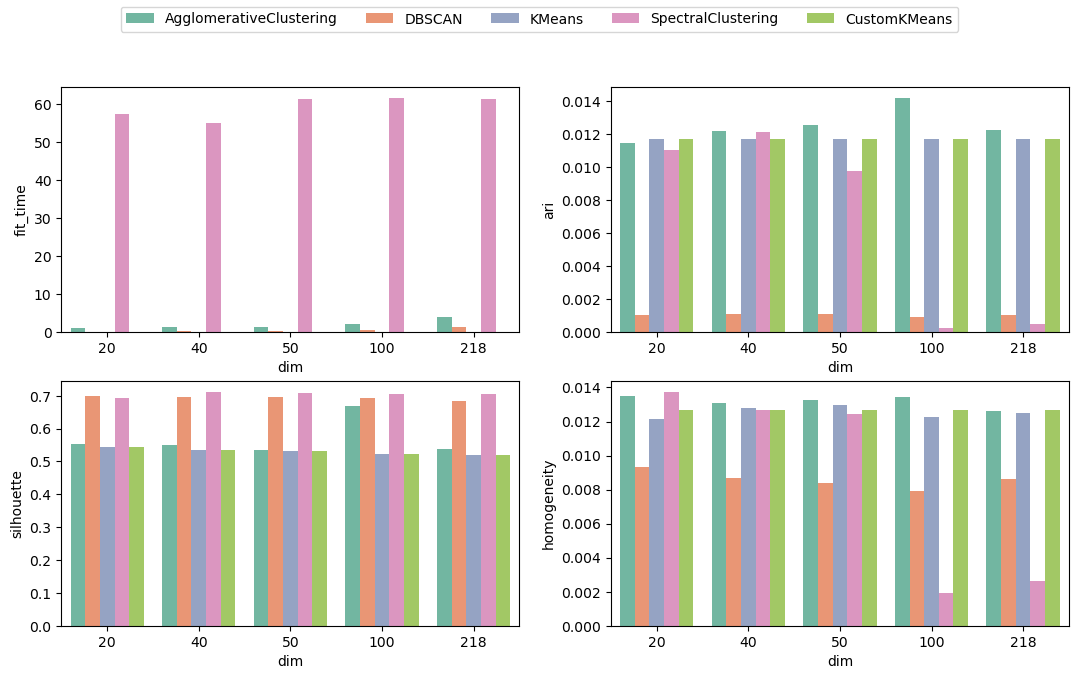

In [76]:
fig, axes = plt.subplots(2, 2, figsize=(13, 7))
handles, legend = None, None
for i, metric in enumerate(['fit_time', 'ari', 'silhouette', 'homogeneity']):
    plot_data = result[result['metric'] == metric] if metric != 'fit_time' else result[result['metric'] == 'ari']
    col = 'best_score' if metric != 'fit_time' else 'fit_time'
    g = sns.barplot(data=plot_data, x='dim', y=col, hue='name', ax=axes[i // 2, i % 2])
    g.legend([], [], frameon=False)
    g.set_ylabel(metric)
    if not handles:
        handles, labels = g.get_legend_handles_labels()

fig.legend(handles, labels, loc='upper center', ncols=5);

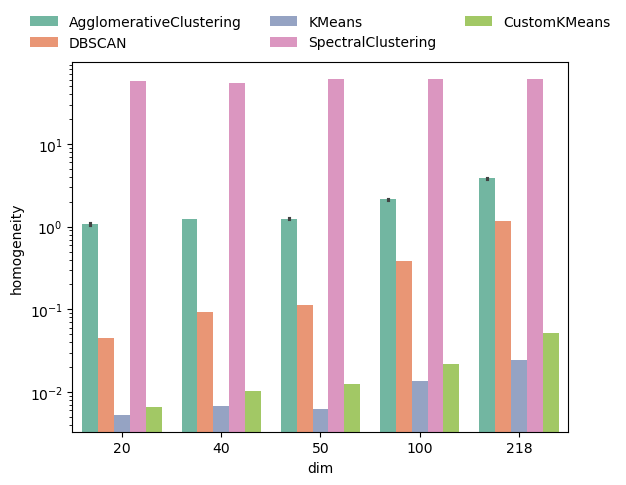

In [77]:
g = sns.barplot(data=result[result['metric'] == 'ari'], x='dim', y='fit_time', hue='name')
g.set_yscale('log')
g.set_ylabel(metric)
sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

Выводы:
- `SpectralClustering` требует больше времени на обучение по сравнению с другими моделями.
- Наименьшее время обучения показал `CustomKMeans`.
- В среднем, снижение размерности не оказывает значительного влияния на результаты, за исключением `SpectralClustering`, где уменьшение размерности до 50 и менее значительно улучшает результаты.
- `AgglomerativeClustering`, `KMeans` и `CustomKMeans` демонстрируют схожие результаты.
- Наилучшие результаты показывают `AgglomerativeClustering` и `SpectralClustering`, особенно при малой размерности.
- Наихудшие результаты демонстрирует `DBSCAN`.